# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [0]:
%matplotlib inline
!pip install pyro-ppl
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

    100% |████████████████████████████████| 215kB 27.2MB/s 
    100% |████████████████████████████████| 61kB 21.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/65/89/2b/1e8facc32da9dbd01a6ad343300cd09a5506f538f4b6407a32
  Stored in directory: /root/.cache/pip/wheels/51/3e/a3/b351fae0cbf15373c2136a54a70f43fea5fe91d8168a5faaa4
Successfully built pyro-ppl opt-einsum


## Generating single value from normal distribution with given mean and variance

In [0]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

## Sampling from categorical probabilities with given probabilities

In [0]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

## Animating data

In [0]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

In [0]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

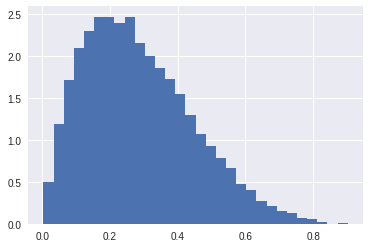

In [0]:
def animate():
    fig, ax = plt.subplots()
    ax.set_xlim(( -5, 5))
    ax.set_ylim((0, 1))

    values = []
      
    def sin(i):
        plt.cla()
        x = np.random.beta(2, 5, size=(i+1)*(i+1)*5)
        values.extend(x)
        p = plt.hist(values, density=True, bins=30)
        return (p,)

    anim = animation.FuncAnimation(fig, sin, init_func=None,
                                   frames=20, interval=20, blit=False)
    return HTML(anim.to_jshtml())

animate()

## Task 2

In [0]:
!pip install pyro-ppl

1
P sick  : 0.000020000000000
R sick  : 0.000019200000000
num sick: 96
num test: 99770
num t&s : 95
P bayes : 0.000989040630588
R t|s   : 0.000952190037085
//////////////////////////////////////
2
P sick  : 0.000040000000000
R sick  : 0.000037400000000
num sick: 187
num test: 100303
num t&s : 183
P bayes : 0.001976166237499
R t|s   : 0.001824471850294
//////////////////////////////////////
3
P sick  : 0.000060000000000
R sick  : 0.000062200000000
num sick: 311
num test: 100242
num t&s : 307
P bayes : 0.002961382377282
R t|s   : 0.003062588535744
//////////////////////////////////////
4
P sick  : 0.000080000000000
R sick  : 0.000080600000000
num sick: 403
num test: 100985
num t&s : 396
P bayes : 0.003944694585010
R t|s   : 0.003921374461554
//////////////////////////////////////
5
P sick  : 0.000100000000000
R sick  : 0.000098200000000
num sick: 491
num test: 100497
num t&s : 488
P bayes : 0.004926108374384
R t|s   : 0.004855866344269
//////////////////////////////////////
6
P sick  : 0

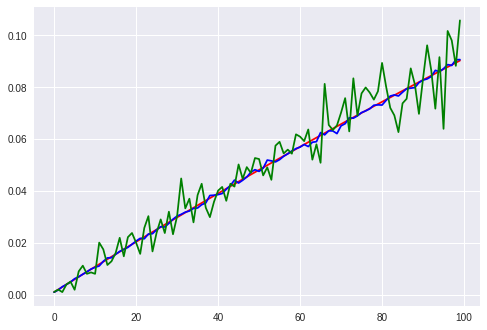

In [2]:
import pyro
import torch
from matplotlib import pyplot as plt

def sample(name, probs, shape=[1]):
  return pyro.sample(name, pyro.distributions.Categorical(probs = probs if isinstance(probs, torch.Tensor) else torch.tensor(probs)), sample_shape=shape).type(torch.uint8)

sick_range = 100
num_ppl = 5000000
num_ppl_low_pop = 50000
num_ppl_from_desc = 50000
prob_fp = 0.02
prob_fn = 0.01
list_bayes = []
list_r_bayes = []
list_r_bayes_low_pop = []

def calc_bayes(i, num_ppl):
  print((i+1))
  prob_sick = (i+1) / num_ppl_from_desc
  print('P sick  : {0:.15f}'.format(prob_sick))
  
  is_sick = sample('sick{}'.format(i), [1-prob_sick, prob_sick], [num_ppl])
  sum_sick = torch.sum(is_sick).item()
  print('R sick  : {0:.15f}'.format(sum_sick / num_ppl))
  print('num sick: {0:d}'.format(sum_sick))
  
  prob_test_positive = is_sick.double() * (1.0 - prob_fn - prob_fp) + prob_fp
  test = sample('test{}'.format(i), torch.stack([1-prob_test_positive, prob_test_positive], dim=1))
  sum_test = torch.sum(test).item()
  print('num test: {0:d}'.format(sum_test))

  test_positive_and_sick = is_sick * test  
  sum_pas = torch.sum(test_positive_and_sick).item()
  print('num t&s : {0:d}'.format(sum_pas)) 
  
  bayes = ((1.0-prob_fn) * prob_sick) / (((1.0-prob_fn) * prob_sick) + prob_fp * (1.0-prob_sick))
  print('P bayes : {0:.15f}'.format(bayes))
    
  r_bayes = sum_pas / sum_test
  print('R t|s   : {0:.15f}'.format(r_bayes))
  print('//////////////////////////////////////')
  return bayes, r_bayes

for i in range(sick_range):
  b, r_b = calc_bayes(i, num_ppl)
  list_bayes.append(b)
  list_r_bayes.append(r_b)
for i in range(sick_range):
  b, r_b = calc_bayes(i, num_ppl_low_pop)
  list_r_bayes_low_pop.append(r_b)
  
plt.plot(list(range(len(list_bayes))), list_bayes, 'r')
plt.plot(list(range(len(list_r_bayes))), list_r_bayes, 'b')
plt.plot(list(range(len(list_r_bayes_low_pop))), list_r_bayes_low_pop, 'g')